In [1]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [9]:
'''WBC DATASET - 699 x 11'''

raw_wbc = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
wbc_cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_wbc.columns = wbc_cols
raw_wbc['Diagnosis'] = raw_wbc['Diagnosis'].map(
                   {2:0,4:1})
temp = []
for index, row in raw_wbc.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
wbc_df = pd.DataFrame(np.array(temp), columns=wbc_cols)
for i in wbc_cols:
        wbc_df[i] = wbc_df[i].astype(np.int)

''' WBDC Dataset - 569 x 32'''

wdbc_cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
wdbc_df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

wdbc_df.columns = wdbc_cols
wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].map(
                   {'M':True,'B':False})




In [10]:
print(wbc_df)

          ID  Thickness  SizeUniformity  ShapeUniformity  Adhesion  Size  \
0    1000025          5               1                1         1     2   
1    1002945          5               4                4         5     7   
2    1015425          3               1                1         1     2   
3    1016277          6               8                8         1     3   
4    1017023          4               1                1         3     2   
..       ...        ...             ...              ...       ...   ...   
678   776715          3               1                1         1     3   
679   841769          2               1                1         1     2   
680   888820          5              10               10         3     7   
681   897471          4               8                6         4     3   
682   897471          4               8                8         5     4   

     BareNuclei  Bland Chromatin  Nucleoli  Mitoses  Diagnosis  
0             1       

Correlation Matrix Size: (11, 11)
Number of Entries: 121
Correlations Over 90: 1.0
Correlations Over 80: 4.0


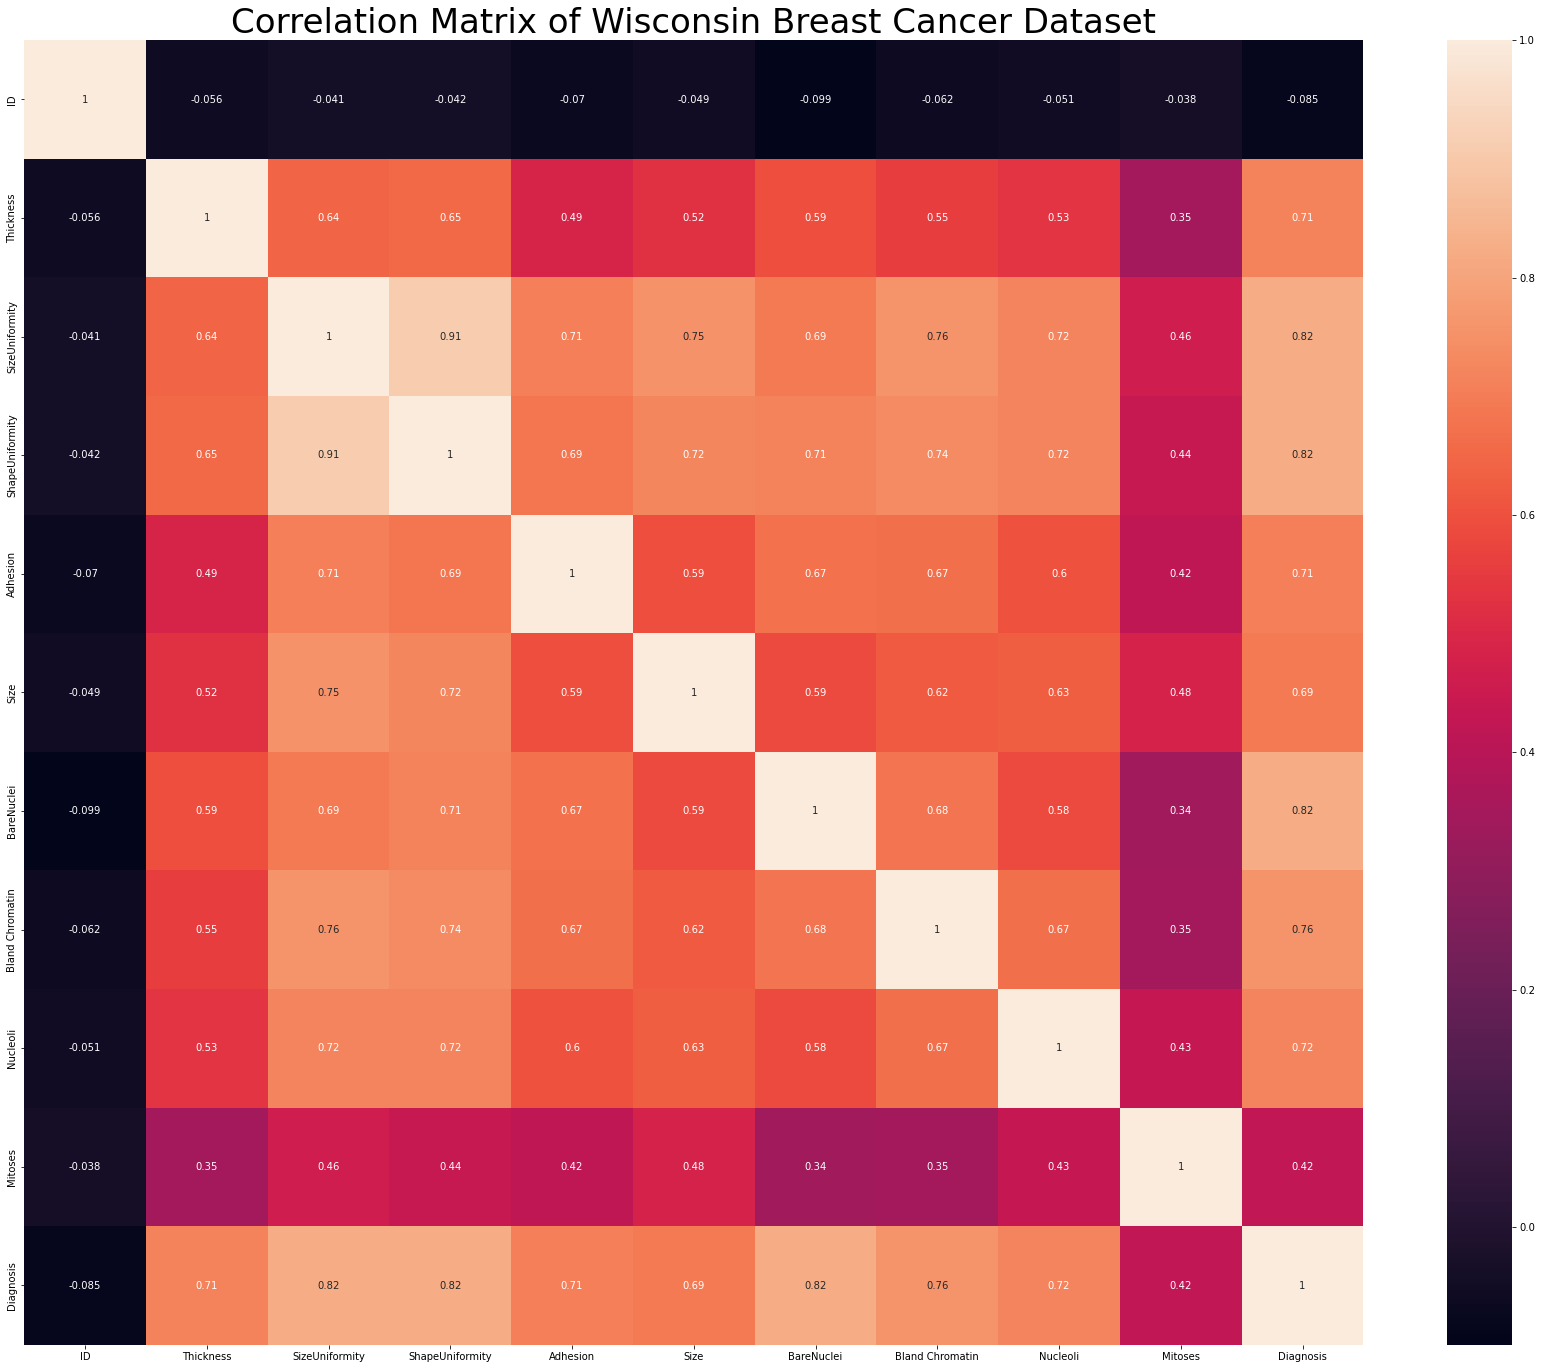

In [13]:
corrMatrix = wbc_df.corr()
numbersAbove90 = 0
numbersAbove80 = 0
for index, row in corrMatrix.iterrows():
    for cell in row:
        if cell > 0.9:
            numbersAbove90 += 1
        if cell > 0.8:
            numbersAbove80 += 1

print('Correlation Matrix Size: {}'.format(corrMatrix.shape))
print('Number of Entries: {}'.format(corrMatrix.shape[0] * corrMatrix.shape[1]))
print('Correlations Over 90: {}'.format((numbersAbove90 - len(wbc_cols))/2))
print('Correlations Over 80: {}'.format((numbersAbove80 - len(wbc_cols))/2))
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (30, 24)
plt.title('Correlation Matrix of Wisconsin Breast Cancer Dataset', fontdict={'fontsize': 34})
plt.show()
